In [23]:
#import the necessary libraries
from models import simple_cnn
from models import simple_stacked_fc_nn
from data_utils import get_dataset_from_tfrecords
from data_utils import audio_to_spectogram_3D
from data_utils import audio_to_spectogram_1D
import matplotlib.pyplot as plt


ImportError: cannot import name 'audio_to_spectogram3D'

Define a helper function to apply different transformations to the audio dataset


In [20]:
def get_datasets(batch_size, transformation_fc):
    """get train, validate and test datasets and perform the parsed transformation function"""
    datasets = {}
    splits = ('train', 'validate', 'test')
    for split in splits:
        ds = get_dataset_from_tfrecords(batch_size=batch_size, split=split)
        ds = ds.map(transformation_fc)    #Transform audio to spectogram
        datasets[split] = ds
    return datasets['train'], datasets['validate'], datasets['test']

Load the datasets and calculate the spectograms

In [22]:
train_ds, validation_ds, test_ds = get_datasets(batch_size=64, 
                                                transformation_fc=audio_to_spectogram3D)
print(train_ds,validation_ds, test_ds, sep='\n')

<MapDataset shapes: ((64, 124, 124, 3), (64, 1)), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((64, 124, 124, 3), (64, 1)), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((64, 124, 124, 3), (64, 1)), types: (tf.float32, tf.int64)>


Defines the first model

In [8]:
model = simple_cnn(124, 124, 12) 
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 124)     3472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 124)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 248)       277016    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 248)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 248)       553784    
_________________________________________________________________
flatten (Flatten)            (None, 180792)            0         
_________________________________________________________________
dense (Dense)                (None, 248)               4

In [10]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
history = model.fit(train_ds, epochs=5, validation_data=validation_ds)

Epoch 1/5
672/672 [==============================] - 224s 333ms/step - loss: 0.8454 - accuracy: 0.7412 - val_loss: 0.6232 - val_accuracy: 0.8105
Epoch 2/5
672/672 [==============================] - 218s 325ms/step - loss: 0.2585 - accuracy: 0.9227 - val_loss: 0.7104 - val_accuracy: 0.8356
Epoch 3/5
672/672 [==============================] - 220s 327ms/step - loss: 0.1461 - accuracy: 0.9608 - val_loss: 1.1469 - val_accuracy: 0.8128
Epoch 4/5
672/672 [==============================] - 220s 328ms/step - loss: 0.0968 - accuracy: 0.9748 - val_loss: 1.1877 - val_accuracy: 0.8325
Epoch 5/5
672/672 [==============================] - 220s 328ms/step - loss: 0.0764 - accuracy: 0.9822 - val_loss: 1.4314 - val_accuracy: 0.8193


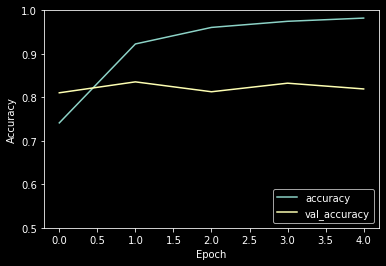

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


In [14]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(test_acc)

0.8277853
